<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/ODE_sistema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El meta-Xyleno se produce en un reactor de flujo de pistón a $1500R$ y $35atm$ a partir de Mesitileno. Ocurren dos reacciones en éste reactor

$$
Mesitileno (M) + Hidrógeno (H) \stackrel{k_1}{\longrightarrow}  Meta-Xyleno (X) + Metano\\
Meta-Xyleno (X) + Hidrógeno (H) \stackrel{k_2}{\longrightarrow}  Tolueno (T) + Metano
$$

La segunda reacción no es deseable porque convierte el meta-Xyleno a Tolueno. El siguiente sistema se obtiene del balance 

$$
\frac{dC_H}{dt}=-k_1C_H^{0.5}C_M-k_2C_H^{0.5}C_X\\
\frac{dC_M}{dt}=-k_1C_H^{0.5}C_M\\
\frac{dC_X}{dt}=k_1C_H^{0.5}C_M-k_2C_H^{0.5}C_X
$$

Donde $k_1$ es la constante de la reacción 1, $k_2$ es la constante de la reacción 2, $C_H$,$C_M$ y
$C_X$ son las concentraciones de hidrógeno, mesitileno y meta-Xyleno en un $t$ específico en el
reactor. Las concentraciones de hidrógeno y mesitileno en la entrada del reactor son $0.021$ y
$0.0105$ $lbmol/ft^3$ y $k_1 = 55.2 ft^3/lbmol 0.5/hr$ $k_2 = 30.2 ft^3/lbmol 0.5/hr$.

Graficar la concentración de hidrógeno, mesitileno, meta-Xyleno como una función de $t$ de $0$ a $0.5 hr$.
Determine el $t$ óptimo en el reactor de flujo de pistón para obtener la máxima cantidad de producto.


In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Sistema de ecuaciones diferenciales
def f(C,t):
  k1 =55.2
  k2 =30.2
  #C [0] concentracion de Hidrogeno
  #C [1] concentracion de Mesitileno
  #C [2] concentracion de Meta - Xylen
  dch =-k1*C [0]**0.5* C[1] - k2*C [0]**0.5* C [2] # Hidrogeno
  dcm =-k1*C [0]**0.5* C [1] # Mesitileno
  dcx =k1*C [0]**0.5* C[1] - k2*C [0]**0.5* C [2] #Meta - Xylen
  return [dch ,dcm , dcx ]

In [ ]:
x0 =0 # valor inicial de tiempo
#y0 =[ Hidrogeno Mesitileno Meta - Xylen ]
y0 =[0.021 ,0.0105 ,0.] # condiciones iniciales de
x1 =0.5 # valor final del tiempo
tiempo =np.linspace (x0,x1)
# llamada a la funcion odeint
sol = odeint(f,y0,tiempo )
#sol

In [ ]:
pmax,idx = np.max(sol[:,2]),np.argmax(sol[:,2])
t=tiempo[idx]
print('tiempo =',t,'hr\nproducto maximo = ',pmax,'lbmol')

tiempo = 0.19387755102040816 hr
producto maximo =  0.005066442312888437 lbmol


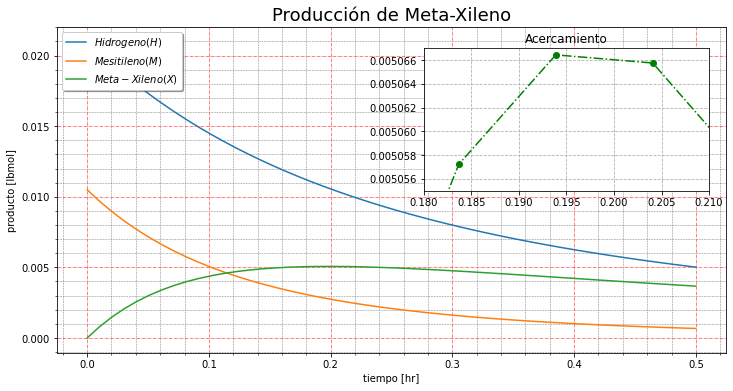

In [ ]:
fig,ax=plt.subplots(1,figsize=(12,6))
ax.minorticks_on()
plt.plot(tiempo,sol[:,0],label = '$Hidrogeno (H)$')
plt.plot(tiempo,sol[:,1],label = '$Mesitileno (M)$')
plt.plot(tiempo,sol[:,2],label = '$Meta - Xileno (X)$')
plt.legend(fancybox=True,shadow=True,loc='upper left')
plt.grid(which='major',linestyle='-.',linewidth=0.5,color='red')
plt.grid(which='minor',linestyle='--',linewidth=0.5,color='gray')
plt.title('Producción de Meta-Xileno',fontsize=18)
plt.xlabel('tiempo [hr]')
plt.ylabel('producto [lbmol]')

inner_ax = fig.add_axes([0.55, 0.5, 0.33, 0.33]) # x, y, width, height
inner_ax.plot(tiempo,sol[:,2],'o-.',color='green')
inner_ax.set(title='Acercamiento', xlim=(0.1800, 0.21),ylim=( 0.005055, 0.005067))
inner_ax.grid(linestyle='--')

plt.show()

Se tiene un arreglo de 3 tanques conectados entre si como se muestra. En el inicio el tanque $T_1$
contiene una solución de salmuera con $150Kg$ de sal en un volumen de $1000 litros$, el tanque $T_2$
contiene una solución de salmuera con $200Kg$ en un volumen de $1000 litros$, y el tanque $T_3$ contiene
una solución de salmuera de $125 Kg$ en un volumen de $1000 litros$, si se hace entrar un flujo de agua
salina a razón de $100 litros/min$ con una concentración de $0.18Kg/litro$, cuál es la concentración de cada tanque pasados $30 min$?

$$
\frac{dC_{T_1}}{dt}=0.018-0.1C_{T_1} \quad C_{T_1}=0.150\\
\frac{dC_{T_2}}{dt}=0.01(C_{T_1}-C_{T_2}) \quad C_{T_2}=0.200\\
\frac{dC_{T_3}}{dt}=0.01(C_{T_2}-C_{T_3}) \quad C_{T_3}=0.125\\
$$

Como podemos observar, la variación de la concentración en el tanque $T_2$ depende de la variación en el tanque $T_1$, a su vez, la concentración del tanque $T_3$ depende de la variación en el tanque $T_2$.

Dada esta dependencia se requiere calcular primero la concentración del tanque $T_1$ en el siguiente
instante para calcular la concentración en el tanque $T_2$ y luego calcular la concentración en el
tanque $T_3$.

In [ ]:
# Sistema de ecuaciones diferenciales
def f(C,t):
  #C [0] concentracion de tanque 1
  #C [1] concentracion de tanque 2
  #C [2] concentracion de tanque 3
  dct1 = 0.018-0.1*C[0]
  dct2 = 0.1*(C[0]-C[1])
  dct3 = 0.1*(C[1]-C[2])
  return [dct1 ,dct2 , dct3 ]

In [ ]:
x0 =0 # valor inicial de tiempo
#y0 =[ t1 t2 t3 ]
y0 =[0.15 ,0.2 ,0.125] # condiciones iniciales 
x1 =30 # valor final del tiempo
tiempo =np.linspace (x0,x1)
# llamada a la funcion odeint
sol = odeint(f,y0,tiempo )
print('Tanque 1: ',sol[-1,0])
print('Tanque 2: ',sol[-1,1])
print('Tanque 3: ',sol[-1,2])

Tanque 1:  0.17850638843443362
Tanque 2:  0.17651490271904194
Tanque 3:  0.17352768496135626


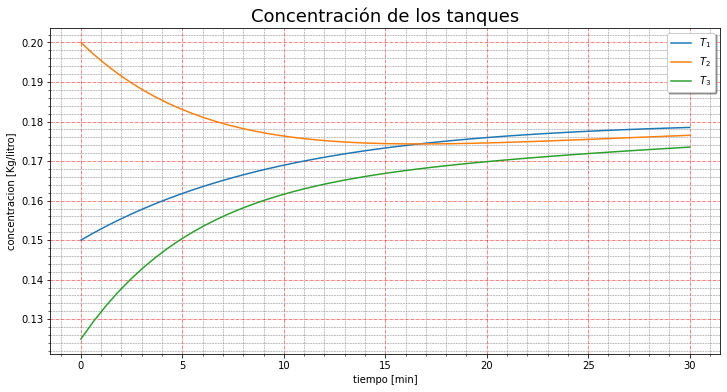

In [ ]:
fig,ax=plt.subplots(1,figsize=(12,6))
ax.minorticks_on()
plt.plot(tiempo,sol[:,0],label = '$T_1$')
plt.plot(tiempo,sol[:,1],label = '$T_2$')
plt.plot(tiempo,sol[:,2],label = '$T_3$')
plt.legend(fancybox=True,shadow=True,loc='best')
plt.grid(which='major',linestyle='-.',linewidth=0.5,color='red')
plt.grid(which='minor',linestyle='--',linewidth=0.5,color='gray')
plt.title('Concentración de los tanques',fontsize=18)
plt.xlabel('tiempo [min]')
plt.ylabel('concentracion [Kg/litro]')
plt.show()